In [6]:
import pandas as pd
import os
import numpy as np
#TRAINING_METAPATH = "D:/dataset/paddle/store/training.json"
VALIDATION_METAPATH = "D:/dataset/paddle/store/validation.json"
TESTING_METAPATH = "D:/dataset/paddle/store/testing.json"

#train_info = pd.read_json(TRAINING_METAPATH)
valid_info = pd.read_json(VALIDATION_METAPATH)
test_info = pd.read_json(TESTING_METAPATH)


valid_database = valid_info["database"]
test_database = test_info["database"]

In [2]:
DATA_DIR = "D:/dataset/paddle/valid/"
def generater_dataset(file_name,dataset_folder,is_norm=False):
    if dataset_folder == "train": 
        DATA_DIR = "D:/dataset/paddle/training/"
        database = train_database
    elif dataset_folder == "valid":
        DATA_DIR = "D:/dataset/paddle/valid/"
        database = valid_database
    elif dataset_folder == "test":
        DATA_DIR = "D:/dataset/paddle/test/"
    file_name_path = os.path.join(DATA_DIR,str(file_name)+".pkl")
    X = np.load(file_name_path)
    X = np.array(X)
   
    
    
    ## get Y label
    valid_new_list = []
    for valid_list in database[file_name]["annotations"]:
        valid_new_list = valid_new_list + valid_list['segment']
    # 转换为 整数
    valid_new_list = np.array(valid_new_list,dtype="int")
    
    label = np.zeros((X.shape[0],1),dtype=np.int8)
    for i in range(len(valid_new_list)/2):
        label[valid_new_list[2*i]:valid_new_list[2*i+1]] =1
    # 采样5
    X = X[::5,:]
    label = label[::5]
    if is_norm:
        X = (X-X.mean())/(X.max()-X.min())
    return X,label

In [7]:
def concat_data (concat_data):
    if concat_data == "train":
        database = train_database
    elif concat_data == "valid":
        database = valid_database
    elif concat_data == "test":
        database = test_database
        
    a = database.keys()
    x_train,y_train = generater_dataset(a[0],concat_data)
    for i in range(1,len(a)):
        x_train_tmp,y_train_tmp=generater_dataset(a[i],concat_data,is_norm=False)
        x_train = np.concatenate((x_train,x_train_tmp),axis=0)
        y_train = np.concatenate((y_train,y_train_tmp),axis=0)
    
    return x_train,y_train

x_train,y_train = concat_data("valid")
a = valid_database.keys()
x_test,y_test = generater_dataset(a[0],"valid")

In [9]:
print x_train.shape,y_train.shape

 (117346L, 2048L) (117346L, 1L)


In [12]:
x_train_vis = x_train[::100,:]
y_train_vis = y_train[::100]
print x_train_vis.shape,y_train_vis.shape

(1174L, 2048L) (1174L, 1L)


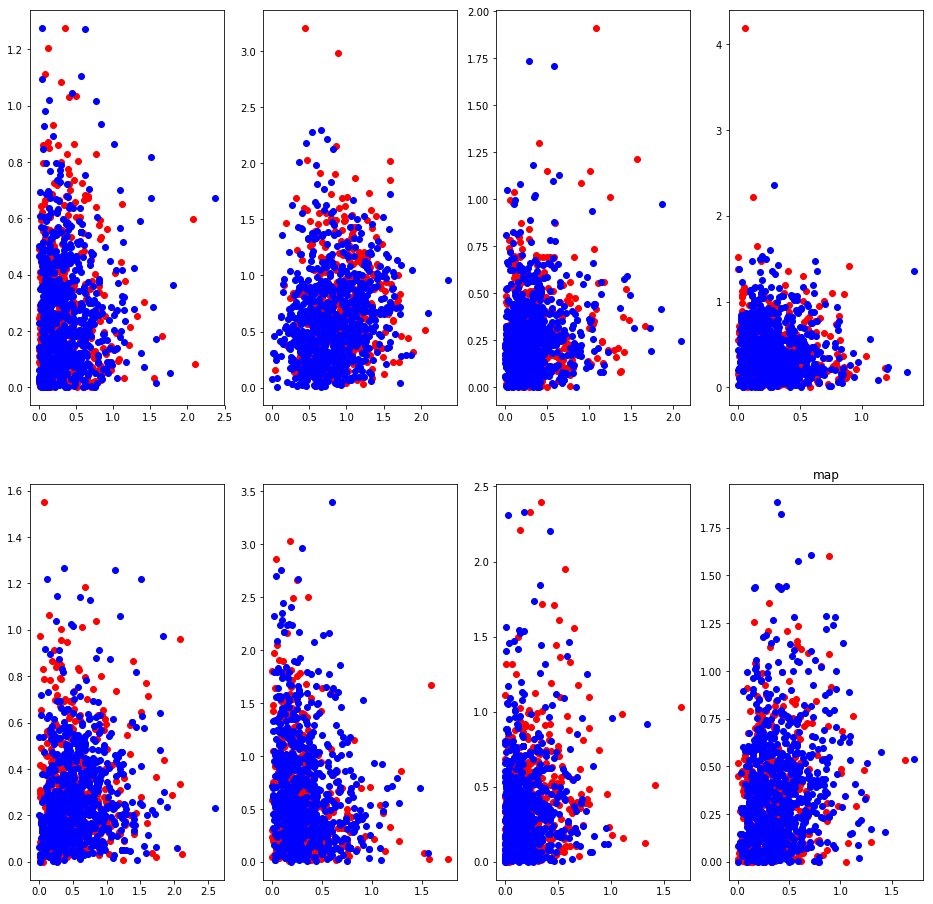

In [26]:
import matplotlib.pyplot as plt
# 显示二维图形
def plot_data(X,y,nrows,ncols):
    pos = np.where(y==1)    
    neg = np.where(y==0)    
    #作图
    plt.figure(figsize=(16,16))
    
    for i in range(nrows):
        for j in range(ncols):
            num = i*ncols+(j+1)
            plt.subplot(nrows,ncols,num)
            cols = int()
            plt.plot(X[pos,0+num*5],X[pos,100+num*5],'ro')        # red o
            plt.plot(X[neg,0+num*5],X[neg,100+num*5],'bo')        # blue o
    plt.title("map")
    plt.show()
plot_data(x_train_vis,y_train_vis,2,4) 